# EDA

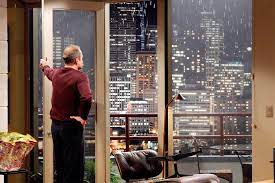

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: orange3-imageanalytics 0.5.3 has a non-standard dependency specifier numpy>=1.16.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of orange3-imageanalytics or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [4]:
import folium

In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

In [ ]:
# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT)

In [ ]:
cur = conn.cursor()

In [ ]:
#Need to define where the table comes from using the name of schema. This case eda.table_name
cur.execute('SELECT * \
FROM eda.king_county_house_details d \
LEFT JOIN eda.king_county_house_sales s \
ON s.house_id = d.id;')
cur.fetchall()

In [ ]:
#close the connection
conn.close()

In [ ]:
from sqlalchemy import create_engine

#read the database string from the .env
load_dotenv()

DB_STRING = os.getenv('DB_STRING')

db = create_engine(DB_STRING)

In [ ]:
from sqlalchemy import create_engine

#read the database string from the .env
load_dotenv()

DB_STRING = os.getenv('DB_STRING')

db = create_engine(DB_STRING)
#import the data to a pandas dataframe
query_string = "SELECT * \
FROM eda.king_county_house_details d \
LEFT JOIN eda.king_county_house_sales s \
ON s.house_id = d.id;"
df_sqlalchemy = pd.read_sql(query_string, db)

In [ ]:
#export the data to a csv-file
df_sqlalchemy.to_csv('eda.csv',index=False)

In [ ]:
#import the data from a csv-file
df = pd.read_csv('data/eda.csv')

In [33]:
pd.set_option('display.max_columns', None)
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495
2,1200019,4.000,1.750,2060.000,26036.000,1.000,NaN,0.000,4,8,1160.000,900.000,1947,0.000,98166,47.444,-122.351,2590.000,21891.000,2014-05-08,647500.000,1200019,6730
3,1200021,3.000,1.000,1460.000,43000.000,1.000,0.000,0.000,3,7,1460.000,0.000,1952,0.000,98166,47.443,-122.347,2250.000,20023.000,2014-08-11,400000.000,1200021,8405
4,2800031,3.000,1.000,1430.000,7599.000,1.500,0.000,0.000,4,6,1010.000,420.000,1930,0.000,98168,47.478,-122.265,1290.000,10320.000,2015-04-01,235000.000,2800031,8801


In [11]:
df.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
id.1               int64
dtype: object

In [35]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


In [5]:
df.count()

id               21597
bedrooms         21597
bathrooms        21597
sqft_living      21597
sqft_lot         21597
floors           21597
waterfront       19206
view             21534
condition        21597
grade            21597
sqft_above       21597
sqft_basement    21145
yr_built         21597
yr_renovated     17749
zipcode          21597
lat              21597
long             21597
sqft_living15    21597
sqft_lot15       21597
date             21597
price            21597
house_id         21597
id.1             21597
dtype: int64

In [12]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


In [6]:
# Creating the historical houses variable (they are the houses that are over a 100 years old).
df['hist_houses'] = 0
df.loc[df['yr_built'] < 1924, 'hist_houses'] = 1

In [7]:
# Creating the historical houses variable (they are the houses that are over a 100 years old).
df['hist_houses'] = 0
df.loc[df['yr_built'] < 1924, 'hist_houses'] = 1

In [8]:
# Creating the historical houses variable (they are the houses that are over a 100 years old).
df['hist_houses'] = 0
df.loc[df['yr_built'] < 1924, 'hist_houses'] = 1

In [9]:
df['hist_houses'].value_counts()

0    19794
1     1803
Name: hist_houses, dtype: int64

In [10]:
df['condition'].value_counts().sort_values()

1       29
2      170
5     1701
4     5677
3    14020
Name: condition, dtype: int64

In [11]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [12]:
df['yr_renovated'].value_counts()

0.000        17005
20140.000       73
20130.000       31
20030.000       31
20070.000       30
             ...  
19590.000        1
19530.000        1
19440.000        1
19510.000        1
19710.000        1
Name: yr_renovated, Length: 70, dtype: int64

In [13]:
# Creating a copy of the DF

df2 = df.copy()

In [14]:
df2.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,hist_houses
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496,0
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495,0
2,1200019,4.000,1.750,2060.000,26036.000,1.000,NaN,0.000,4,8,1160.000,900.000,1947,0.000,98166,47.444,-122.351,2590.000,21891.000,2014-05-08,647500.000,1200019,6730,0
3,1200021,3.000,1.000,1460.000,43000.000,1.000,0.000,0.000,3,7,1460.000,0.000,1952,0.000,98166,47.443,-122.347,2250.000,20023.000,2014-08-11,400000.000,1200021,8405,0
4,2800031,3.000,1.000,1430.000,7599.000,1.500,0.000,0.000,4,6,1010.000,420.000,1930,0.000,98168,47.478,-122.265,1290.000,10320.000,2015-04-01,235000.000,2800031,8801,0


In [15]:
# Replacing missing per 2024
df2['yr_renovated'].fillna(2024, inplace=True)

In [16]:
# Replacing 0 format
df2['yr_renovated'] = df2.yr_renovated.replace(0, 2024)

In [17]:
df2.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,hist_houses
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,2024.000,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496,0
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,2024.000,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495,0
2,1200019,4.000,1.750,2060.000,26036.000,1.000,NaN,0.000,4,8,1160.000,900.000,1947,2024.000,98166,47.444,-122.351,2590.000,21891.000,2014-05-08,647500.000,1200019,6730,0
3,1200021,3.000,1.000,1460.000,43000.000,1.000,0.000,0.000,3,7,1460.000,0.000,1952,2024.000,98166,47.443,-122.347,2250.000,20023.000,2014-08-11,400000.000,1200021,8405,0
4,2800031,3.000,1.000,1430.000,7599.000,1.500,0.000,0.000,4,6,1010.000,420.000,1930,2024.000,98168,47.478,-122.265,1290.000,10320.000,2015-04-01,235000.000,2800031,8801,0


In [18]:
# Convert 'yr_renovated' to integer
df2['yr_renovated'] = df2['yr_renovated'].astype(int)

In [19]:
df2.yr_renovated.dtypes

dtype('int32')

In [20]:
df2.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,hist_houses
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,2024,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496,0
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,2024,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495,0
2,1200019,4.000,1.750,2060.000,26036.000,1.000,NaN,0.000,4,8,1160.000,900.000,1947,2024,98166,47.444,-122.351,2590.000,21891.000,2014-05-08,647500.000,1200019,6730,0
3,1200021,3.000,1.000,1460.000,43000.000,1.000,0.000,0.000,3,7,1460.000,0.000,1952,2024,98166,47.443,-122.347,2250.000,20023.000,2014-08-11,400000.000,1200021,8405,0
4,2800031,3.000,1.000,1430.000,7599.000,1.500,0.000,0.000,4,6,1010.000,420.000,1930,2024,98168,47.478,-122.265,1290.000,10320.000,2015-04-01,235000.000,2800031,8801,0


In [21]:
# Convert 'yr_renovated' to string
df2['yr_renovated'] = df2['yr_renovated'].astype(str)

In [22]:
df2.yr_renovated.dtypes

dtype('O')

In [23]:
df2['yr_renovated'].value_counts()

2024     20853
20140       73
20130       31
20030       31
20070       30
         ...  
19590        1
19530        1
19440        1
19510        1
19710        1
Name: yr_renovated, Length: 70, dtype: int64

In [24]:
# Replacing 2024 per 20240
df2['yr_renovated'] = df2.yr_renovated.replace('2024', '20240')

In [25]:
df2['yr_renovated'].value_counts()

20240    20853
20140       73
20130       31
20030       31
20070       30
         ...  
19590        1
19530        1
19440        1
19510        1
19710        1
Name: yr_renovated, Length: 70, dtype: int64

In [26]:
# Converting to String
df2['yr_renovated'] = df2['yr_renovated'].astype(str)

In [27]:
print(df2['yr_renovated'].dtypes)

object


In [28]:
# Removing the last caractere (0)
df2['yr_renovatedv2'] = df2['yr_renovated'].str[:-1]

In [29]:
df2.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,hist_houses,yr_renovatedv2
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,20240,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496,0,2024
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,20240,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495,0,2024
2,1200019,4.000,1.750,2060.000,26036.000,1.000,NaN,0.000,4,8,1160.000,900.000,1947,20240,98166,47.444,-122.351,2590.000,21891.000,2014-05-08,647500.000,1200019,6730,0,2024
3,1200021,3.000,1.000,1460.000,43000.000,1.000,0.000,0.000,3,7,1460.000,0.000,1952,20240,98166,47.443,-122.347,2250.000,20023.000,2014-08-11,400000.000,1200021,8405,0,2024
4,2800031,3.000,1.000,1430.000,7599.000,1.500,0.000,0.000,4,6,1010.000,420.000,1930,20240,98168,47.478,-122.265,1290.000,10320.000,2015-04-01,235000.000,2800031,8801,0,2024


In [30]:
df2['yr_renovatedv2'].value_counts()

2024    20853
2014       73
2013       31
2003       31
2007       30
        ...  
1959        1
1953        1
1944        1
1951        1
1971        1
Name: yr_renovatedv2, Length: 70, dtype: int64

In [31]:
# Convert 'yr_renovated' to integer
df2['yr_renovatedv2'] = df2['yr_renovatedv2'].astype(int)

In [32]:
df2.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,hist_houses,yr_renovatedv2
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,20240,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496,0,2024
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,20240,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495,0,2024
2,1200019,4.000,1.750,2060.000,26036.000,1.000,NaN,0.000,4,8,1160.000,900.000,1947,20240,98166,47.444,-122.351,2590.000,21891.000,2014-05-08,647500.000,1200019,6730,0,2024
3,1200021,3.000,1.000,1460.000,43000.000,1.000,0.000,0.000,3,7,1460.000,0.000,1952,20240,98166,47.443,-122.347,2250.000,20023.000,2014-08-11,400000.000,1200021,8405,0,2024
4,2800031,3.000,1.000,1430.000,7599.000,1.500,0.000,0.000,4,6,1010.000,420.000,1930,20240,98168,47.478,-122.265,1290.000,10320.000,2015-04-01,235000.000,2800031,8801,0,2024


In [33]:
df2['yr_renovatedv2'] = df2.yr_renovatedv2.replace(2024, np.NaN)

In [34]:
df2['yr_renovatedv2'].value_counts()

2014.000    73
2003.000    31
2013.000    31
2007.000    30
2000.000    29
            ..
1976.000     1
1948.000     1
1946.000     1
1954.000     1
1971.000     1
Name: yr_renovatedv2, Length: 69, dtype: int64

In [35]:
print(df2['yr_renovatedv2'].dtypes)

float64


In [36]:
# Convert 'yr_renovated' to integer
df2['yr_renovatedv2'] = df2['yr_renovatedv2'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [38]:
df2['years_of_renovation'] = df2['yr_renovatedv2'] - df2['yr_built']

In [39]:
df2.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,hist_houses,yr_renovatedv2,years_of_renovation
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,20240,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496,0,NaN,NaN
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,20240,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495,0,NaN,NaN
2,1200019,4.000,1.750,2060.000,26036.000,1.000,NaN,0.000,4,8,1160.000,900.000,1947,20240,98166,47.444,-122.351,2590.000,21891.000,2014-05-08,647500.000,1200019,6730,0,NaN,NaN
3,1200021,3.000,1.000,1460.000,43000.000,1.000,0.000,0.000,3,7,1460.000,0.000,1952,20240,98166,47.443,-122.347,2250.000,20023.000,2014-08-11,400000.000,1200021,8405,0,NaN,NaN
4,2800031,3.000,1.000,1430.000,7599.000,1.500,0.000,0.000,4,6,1010.000,420.000,1930,20240,98168,47.478,-122.265,1290.000,10320.000,2015-04-01,235000.000,2800031,8801,0,NaN,NaN


In [40]:
df2['years_of_renovationv2'].value_counts()

KeyError: 'years_of_renovationv2'

In [41]:
print(df2['years_of_renovationv2'].dtypes)

KeyError: 'years_of_renovationv2'

In [42]:
# Converting years_of_renovationv2 to String
df2['years_of_renovationv2'] = df2['years_of_renovation'].astype(str)

In [43]:
df2['years_of_renovationv2'] = df2.years_of_renovationv2.replace('??.0','??')

In [44]:
df2['years_of_renovationv2'].value_counts()

nan      20853
43.0        17
63.0        17
37.0        16
86.0        15
         ...  
105.0        1
113.0        1
6.0          1
16.0         1
13.0         1
Name: years_of_renovationv2, Length: 104, dtype: int64

In [45]:
# reaplying information to the original variable
df2['years_of_renovation'] = df2['years_of_renovationv2']

In [46]:
df2['yr_renovated'] = df2['yr_renovatedv2']

In [47]:
df2['yr_renovated'].value_counts().sort_index()

1934.000     1
1940.000     2
1944.000     1
1945.000     3
1946.000     1
            ..
2011.000     9
2012.000     8
2013.000    31
2014.000    73
2015.000    14
Name: yr_renovated, Length: 69, dtype: int64

In [48]:
#Excluding the temporary variables
df2.drop(['years_of_renovationv2', 'yr_renovatedv2'], inplace=True, axis=1)

In [49]:
# Convert 'yr_renovated' to integer
df2['years_of_renovation'] = df2['years_of_renovation'].astype(int)

ValueError: invalid literal for int() with base 10: 'nan'

In [50]:
df2.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,hist_houses,years_of_renovation
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,NaN,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496,0,nan
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,NaN,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495,0,nan
2,1200019,4.000,1.750,2060.000,26036.000,1.000,NaN,0.000,4,8,1160.000,900.000,1947,NaN,98166,47.444,-122.351,2590.000,21891.000,2014-05-08,647500.000,1200019,6730,0,nan
3,1200021,3.000,1.000,1460.000,43000.000,1.000,0.000,0.000,3,7,1460.000,0.000,1952,NaN,98166,47.443,-122.347,2250.000,20023.000,2014-08-11,400000.000,1200021,8405,0,nan
4,2800031,3.000,1.000,1430.000,7599.000,1.500,0.000,0.000,4,6,1010.000,420.000,1930,NaN,98168,47.478,-122.265,1290.000,10320.000,2015-04-01,235000.000,2800031,8801,0,nan


In [51]:
df2['years_of_renovation'].value_counts().sort_index()

10.0         1
100.0        5
101.0        3
102.0        4
103.0        2
         ...  
96.0         4
97.0         5
98.0         6
99.0         3
nan      20853
Name: years_of_renovation, Length: 104, dtype: int64

In [52]:
df2['years_of_renovationv2'] = df2['years_of_renovation']

In [53]:
# Converting the variable years_of_renovation to nummeric
df2['years_of_renovation'] = pd.to_numeric(df2['years_of_renovation'], errors='coerce')

In [54]:
# Converting the variable years_of_renovation to nummeric
df2['years_of_renovationv2'] = pd.to_numeric(df2['years_of_renovationv2'], errors='coerce')

In [55]:
df2['years_of_renovation'].fillna(9999, inplace=True)

In [56]:
df2['years_of_renovation'].value_counts().sort_index()

6.000           1
9.000           2
10.000          1
12.000          3
13.000          1
            ...  
109.000         1
110.000         2
113.000         1
114.000         3
9999.000    20853
Name: years_of_renovation, Length: 104, dtype: int64

In [57]:
# Creating categorized variable hist_houses

df2['hist_houses_offers'] = 'Outside the profile'

# Aplique as condições
condition1 = (df2['hist_houses'] == 1)
condition2 = (df2['years_of_renovation'] <=10)

condition3 = (df2['years_of_renovation'] > 10)

condition4 = (df2['condition'] == 3)
condition5 = (df2['grade'] >= 8)

condition6 = (df2['condition'] >= 4)
condition7 = (df2['grade'] >= 8)

# Atualize 'hist_houses_offers' para 1 onde todas as condições são verdadeiras
df2.loc[condition1 & condition2, 'hist_houses_offers'] = 'Reformed'
df2.loc[condition1 & condition3, 'hist_houses_offers'] = 'Not reformed'
df2.loc[condition1 & condition3 & condition4 & condition5, 'hist_houses_offers'] = 'Not Reformed: Low cost reformations'
df2.loc[condition1 & condition3 & condition6 & condition7, 'hist_houses_offers'] = 'Not Reformed: Without need for reformation'


In [58]:
df2['hist_houses_offers'].value_counts()

Outside the profile                           19794
Not reformed                                   1370
Not Reformed: Without need for reformation      235
Not Reformed: Low cost reformations             198
Name: hist_houses_offers, dtype: int64

In [59]:
pd.pivot_table(df2, index='hist_houses_offers', values='price', aggfunc=['count', 'mean','min','max'])

,count,mean,min,max
,price,price,price,price
hist_houses_offers,,,,
Not Reformed: Low cost reformations,198,923684.803,302000.000,3000000.000
Not Reformed: Without need for reformation,235,1100838.366,215000.000,7700000.000
Not reformed,1370,467032.028,80000.000,2560000.000
Outside the profile,19794,534877.469,78000.000,7060000.000


In [60]:
df2['hist_houses_offers'].value_counts()

Outside the profile                           19794
Not reformed                                   1370
Not Reformed: Without need for reformation      235
Not Reformed: Low cost reformations             198
Name: hist_houses_offers, dtype: int64

In [61]:
df2.dtypes

id                         int64
bedrooms                 float64
bathrooms                float64
sqft_living              float64
sqft_lot                 float64
floors                   float64
waterfront               float64
view                     float64
condition                  int64
grade                      int64
sqft_above               float64
sqft_basement            float64
yr_built                   int64
yr_renovated             float64
zipcode                    int64
lat                      float64
long                     float64
sqft_living15            float64
sqft_lot15               float64
date                      object
price                    float64
house_id                   int64
id.1                       int64
hist_houses                int64
years_of_renovation      float64
years_of_renovationv2    float64
hist_houses_offers        object
dtype: object

In [62]:
df2.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,hist_houses,years_of_renovation,years_of_renovationv2,hist_houses_offers
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,NaN,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496,0,9999.000,NaN,Outside the profile
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,NaN,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495,0,9999.000,NaN,Outside the profile
2,1200019,4.000,1.750,2060.000,26036.000,1.000,NaN,0.000,4,8,1160.000,900.000,1947,NaN,98166,47.444,-122.351,2590.000,21891.000,2014-05-08,647500.000,1200019,6730,0,9999.000,NaN,Outside the profile
3,1200021,3.000,1.000,1460.000,43000.000,1.000,0.000,0.000,3,7,1460.000,0.000,1952,NaN,98166,47.443,-122.347,2250.000,20023.000,2014-08-11,400000.000,1200021,8405,0,9999.000,NaN,Outside the profile
4,2800031,3.000,1.000,1430.000,7599.000,1.500,0.000,0.000,4,6,1010.000,420.000,1930,NaN,98168,47.478,-122.265,1290.000,10320.000,2015-04-01,235000.000,2800031,8801,0,9999.000,NaN,Outside the profile


In [63]:
import matplotlib.pylab as plt
import plotly.express as px

In [64]:
'''df.plot(kind='scatter',
        x='hist_houses_offers',
        y='price',
        title='hist_houses_offers vs. price')
plt.show()

SyntaxError: EOF while scanning triple-quoted string literal (4278586536.py, line 5)

In [ ]:
ax = sns.scatterplot(x='hist_houses_offers',
                y='price',
                hue='hist_houses_offers',
                data=df2)
ax.set_title('hist_houses_offers vs. price')
plt.show()

In [65]:
df2.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,hist_houses,years_of_renovation,years_of_renovationv2,hist_houses_offers
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,NaN,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496,0,9999.000,NaN,Outside the profile
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,NaN,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495,0,9999.000,NaN,Outside the profile
2,1200019,4.000,1.750,2060.000,26036.000,1.000,NaN,0.000,4,8,1160.000,900.000,1947,NaN,98166,47.444,-122.351,2590.000,21891.000,2014-05-08,647500.000,1200019,6730,0,9999.000,NaN,Outside the profile
3,1200021,3.000,1.000,1460.000,43000.000,1.000,0.000,0.000,3,7,1460.000,0.000,1952,NaN,98166,47.443,-122.347,2250.000,20023.000,2014-08-11,400000.000,1200021,8405,0,9999.000,NaN,Outside the profile
4,2800031,3.000,1.000,1430.000,7599.000,1.500,0.000,0.000,4,6,1010.000,420.000,1930,NaN,98168,47.478,-122.265,1290.000,10320.000,2015-04-01,235000.000,2800031,8801,0,9999.000,NaN,Outside the profile


In [66]:
# Map model with all houses

'''# Create a map centered around King County
m = folium.Map(location=[47.6062, -122.3321], zoom_start=10)
# Iterate through the DataFrame and add markers for each house
for index, row in df2.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"House ID: {row['id']}<br>Price: ${row['price']:.2f}<br>House Grading: {row['grade']}",
        icon=folium.Icon(color='red')
    ).add_to(m)
# Display the map/ save it as html.
m.save('king_county_houses_map_test.html')

SyntaxError: EOF while scanning triple-quoted string literal (3287010319.py, line 13)

In [67]:
# Creating a new Dataset just with the three usefull categories

conditions = df2['hist_houses_offers'].isin(['Not reformed', 'Not Reformed: Without need for reformation', 'Not Reformed: Low cost reformations'])
df_hh = df2[conditions]

In [68]:
df_hh['hist_houses_offers'].value_counts()

Not reformed                                  1370
Not Reformed: Without need for reformation     235
Not Reformed: Low cost reformations            198
Name: hist_houses_offers, dtype: int64

In [86]:
# Map with pre selected houses
import folium
# Create a map centered around King County
m = folium.Map(location=[47.6062, -122.3321], zoom_start=10)

# Iterate through the DataFrame and add markers for each house
for index, row in df_hh['hist_houses_offers'].iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"House ID: {row['id']}<br>Price: ${row['price']:.2f}<br>House Grading: {row['grade']}",
        icon=folium.Icon(color='blue')
    ).add_to(m)
# Display the map/ save it as html.
m.save('king_county_preselected_houses_map.html')

AttributeError: 'Series' object has no attribute 'iterrows'

In [ ]:
# Map with pre selected houses by category

# Create a map centered around King County
m = folium.Map(location=[47.6062, -122.3321], zoom_start=10)

# Iterate through the DataFrame and add markers for each house
for index, row in df_hh.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"House ID: {row['id']}<br>Price: ${row['price']:.2f}<br>House Grading: {row['grade']}",
        icon=folium.Icon(color='blue')
    ).add_to(m)
# Display the map/ save it as html.
m.save('king_county_preselected_houses_map.html')

In [70]:
df_hh.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,hist_houses,years_of_renovation,years_of_renovationv2,hist_houses_offers
14,7600057,3.000,2.000,1410.000,2700.000,2.000,0.000,0.000,4,7,1410.000,0.000,1902,NaN,98122,47.603,-122.302,1750.000,4000.000,2014-08-05,520000.000,7600057,4478,1,9999.000,NaN,Not reformed
16,7600125,5.000,1.000,3020.000,4800.000,2.000,0.000,0.000,3,7,3020.000,0.000,1901,NaN,98122,47.602,-122.313,1350.000,1307.000,2014-12-18,630000.000,7600125,10411,1,9999.000,NaN,Not reformed
35,13001215,3.000,1.000,1100.000,5100.000,1.000,0.000,0.000,4,7,1100.000,0.000,1913,NaN,98108,47.523,-122.332,1450.000,5100.000,2015-03-05,130000.000,13001215,12712,1,9999.000,NaN,Not reformed
36,13001795,4.000,2.750,2500.000,5100.000,1.500,0.000,0.000,4,7,1420.000,1080.000,1907,NaN,98108,47.523,-122.332,1430.000,5100.000,2014-10-14,319500.000,13001795,15620,1,9999.000,NaN,Not reformed
38,13002460,2.000,1.750,1740.000,5100.000,1.000,0.000,0.000,3,6,580.000,1160.000,1915,NaN,98108,47.521,-122.330,1440.000,5100.000,2015-03-18,205000.000,13002460,8349,1,9999.000,NaN,Not reformed


In [71]:
''' funcionou, mas to desativando para liberar menoria
fig = px.scatter_geo(df2,  # Seu DataFrame
                     lat='lat',  # Nome da coluna com as coordenadas de latitude
                     lon='long',  # Nome da coluna com as coordenadas de longitude
                     hover_name='hist_houses_offers',  # Nome da coluna com rótulos de hover (opcional)
                     title='Historic Houses offered',  # Título do gráfico (opcional)
                     projection='natural earth'  # Tipo de projeção do mapa (opcional)
                     )

fig.show()

SyntaxError: EOF while scanning triple-quoted string literal (3035452298.py, line 10)

In [72]:
df_hh['zipcode'].value_counts()

98103    207
98118    145
98122    132
98144    114
98117    114
        ... 
98040      1
98059      1
98028      1
98077      1
98006      1
Name: zipcode, Length: 61, dtype: int64

In [73]:
zip = pd.pivot_table(df_hh, index='zipcode', values='price', aggfunc=['count', 'mean','min','max'])
print(zip)

        count        mean         min         max
        price       price       price       price
zipcode                                          
98001      10  192630.000  115000.000  262500.000
98002      25  204727.800   95000.000  279950.000
98004       7 1741428.571 1000000.000 3000000.000
98006       1  428750.000  428750.000  428750.000
98010       8  204142.875  135000.000  257000.000
...       ...         ...         ...         ...
98177       7  484485.714  365500.000  850000.000
98178      13  340269.231  160000.000  825000.000
98188       1  171000.000  171000.000  171000.000
98198       8  350125.000   95000.000  570000.000
98199      21  646309.714  345000.000 1810000.000

[61 rows x 4 columns]


In [74]:
pd.pivot_table(df_hh, index='zipcode', values='price', aggfunc=['mean'])

,mean
,price
zipcode,
98001,192630.000
98002,204727.800
98004,1741428.571
98006,428750.000
98010,204142.875
...,...
98177,484485.714
98178,340269.231


In [75]:
# Criando variável neighborhood
zipcode_to_neighborhood = {
98001: 'Algona',
98001: 'Auburn',
98001: 'Federal Way',
98002: 'Auburn',
98003: 'Auburn',
98003: 'Federal Way',
98004: 'Beaux Arts Village',
98004: 'Bellevue',
98004: 'Clyde Hill',
98004: 'Hunts Point',
98004: 'Yarrow Point',
98005: 'Bellevue',
98006: 'Bellevue',
98007: 'Bellevue',
98008: 'Bellevue',
98009: 'Bellevue',
98010: 'Black Diamond',
98011: 'Bothell',
98013: 'Burton',
98013: 'Vashon',
98014: 'Carnation',
98015: 'Bellevue',
98019: 'Duvall',
98022: 'Enumclaw',
98023: 'Auburn',
98023: 'Federal Way',
98024: 'Fall City',
98025: 'Hobart',
98027: 'Issaquah',
98028: 'Kenmore',
98028: 'Bothell',
98029: 'Issaquah',
98030: 'Kent',
98031: 'Kent',
98032: 'Kent',
98033: 'Kirkland',
98034: 'Kirkland',
98035: 'Kent',
98038: 'Maple Valley',
98039: 'Medina',
98040: 'Mercer Island',
98041: 'Bothell',
98042: 'Covington',
98042: 'Kent',
98045: 'North Bend',
98047: 'Auburn',
98047: 'Pacific',
98050: 'Preston',
98051: 'Ravensdale',
98052: 'Redmond',
98053: 'Redmond',
98054: 'Redondo',
98055: 'Renton',
98056: 'Newcastle',
98056: 'Renton',
98057: 'Renton',
98058: 'Renton',
98059: 'Newcastle',
98059: 'Renton',
98062: 'Seahurst',
98063: 'Auburn',
98063: 'Federal Way',
98064: 'Kent',
98065: 'Snoqualmie',
98068: 'Snoqualmie Pass',
98068: 'Snoqualmie',
98070: 'Vashon',
98071: 'Auburn',
98072: 'Woodinville',
98073: 'Redmond',
98074: 'Sammamish',
98074: 'Redmond',
98075: 'Sammamish',
98075: 'Issaquah',
98083: 'Kirkland',
98092: 'Auburn',
98093: 'Auburn',
98093: 'Federal Way',
98101: 'Seattle',
98102: 'Seattle',
98103: 'Seattle',
98104: 'Seattle',
98105: 'Seattle',
98106: 'Seattle',
98107: 'Seattle',
98108: 'Seattle',
98108: 'Tukwila',
98109: 'Seattle',
98111: 'Seattle',
98112: 'Seattle',
98114: 'Seattle',
98115: 'Seattle',
98116: 'Seattle',
98117: 'Seattle',
98118: 'Seattle',
98119: 'Seattle',
98121: 'Seattle',
98122: 'Seattle',
98124: 'Seattle',
98125: 'Seattle',
98126: 'Seattle',
98131: 'Seattle',
98132: 'Seattle',
98133: 'Seattle',
98133: 'Shoreline',
98134: 'Seattle',
98136: 'Seattle',
98138: 'Seattle',
98138: 'Tukwila',
98144: 'Seattle',
98145: 'Seattle',
98146: 'Burien',
98146: 'Seattle',
98148: 'Burien',
98148: 'Des Moines',
98148: 'Normandy Park',
98148: 'Seatac',
98148: 'Seattle',
98154: 'Seattle',
98155: 'Lk Forest Park',
98155: 'Lk Forest Pk',
98155: 'Lake Forest Park',
98155: 'Seattle',
98155: 'Shoreline',
98158: 'Seatac',
98158: 'Seattle',
98160: 'Seattle',
98161: 'Seattle',
98164: 'Seattle',
98166: 'Burien',
98166: 'Normandy Park',
98166: 'Seattle',
98168: 'Burien',
98168: 'Seatac',
98168: 'Seattle',
98168: 'Tukwila',
98171: 'Seattle',
98174: 'Seattle',
98177: 'Seattle',
98177: 'Shoreline',
98178: 'Seattle',
98178: 'Tukwila',
98188: 'Seatac',
98188: 'Seattle',
98188: 'Tukwila',
98198: 'Des Moines',
98198: 'Normandy Park',
98198: 'Seatac',
98198: 'Seattle',
98199: 'Seattle',
98224: 'Baring',
98288: 'Skykomish'}

df_hh['neighborhood'] = df_hh['zipcode'].map(zipcode_to_neighborhood)

In [76]:
pd.pivot_table(df_hh, index='neighborhood', values='price', aggfunc=['mean','count'])

,mean,count
,price,price
neighborhood,,
Auburn,206680.577,26
Bellevue,428750.000,1
Black Diamond,204142.875,8
Bothell,388333.333,3
Carnation,218850.000,7
Duvall,317487.500,4
Enumclaw,252154.167,24
Fall City,393612.500,8


In [77]:
pd.pivot_table(df_hh, index='zipcode', values='price', aggfunc=['mean','count'])

,mean,count
,price,price
zipcode,,
98001,192630.000,10
98002,204727.800,25
98004,1741428.571,7
98006,428750.000,1
98010,204142.875,8
...,...,...
98177,484485.714,7
98178,340269.231,13


In [83]:
zipcodes = [98040, 98004, 98039, 98112, 98102, 98109, 98119, 98125, 98033, 98105]
condition = df_hh['zipcode'].isin(zipcodes)
dff = df_hh[condition]

In [84]:
dff['zipcode'].value_counts()

98112    99
98119    80
98105    71
98102    47
98109    45
98033    11
98004     7
98125     5
98040     1
98039     1
Name: zipcode, dtype: int64

In [85]:
dff.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,hist_houses,years_of_renovation,years_of_renovationv2,hist_houses_offers,neighborhood
1318,625059051,4.000,2.250,4370.000,22863.000,2.500,0.000,3.000,4,10,3670.000,NaN,1907,1994.000,98033,47.688,-122.215,2980.000,22863.000,2014-09-03,2350000.000,625059051,1769,1,87.000,87.000,Not Reformed: Without need for reformation,Kirkland
1344,629000704,4.000,2.000,1780.000,15648.000,1.500,0.000,0.000,5,8,1780.000,0.000,1918,NaN,98004,47.585,-122.198,2320.000,14963.000,2014-07-29,1000000.000,629000704,14594,1,9999.000,NaN,Not Reformed: Without need for reformation,Yarrow Point
1664,809000820,2.000,1.750,1560.000,1750.000,1.000,NaN,0.000,4,6,780.000,780.000,1904,NaN,98109,47.635,-122.355,1850.000,3600.000,2014-05-22,494400.000,809000820,3566,1,9999.000,NaN,Not reformed,Seattle
1665,809000945,6.000,1.000,1730.000,2760.000,1.500,0.000,0.000,3,7,1250.000,480.000,1918,NaN,98109,47.634,-122.353,1630.000,3200.000,2015-01-06,563000.000,809000945,3610,1,9999.000,NaN,Not reformed,Seattle
1666,809001060,4.000,1.500,2740.000,4000.000,2.000,0.000,0.000,5,9,1930.000,NaN,1905,NaN,98109,47.634,-122.352,1680.000,4000.000,2014-05-13,1110000.000,809001060,14996,1,9999.000,NaN,Not Reformed: Without need for reformation,Seattle


In [ ]:
import folium

In [91]:
# Map with selected houses

# Create a map centered around King County
m = folium.Map(location=[47.6062, -122.3321], zoom_start=10)

# Iterate through the DataFrame and add markers for each house
for index, row in dff.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"House ID: {row['id']}<br>Price: ${row['price']:.2f}<br>House Grading: {row['grade']}",
        icon=folium.Icon(color='blue')
    ).add_to(m)
# Display the map/ save it as html.
m.save('king_county_selected_houses_map.html')

In [92]:
# Create a map centered around King County
m = folium.Map(location=[47.6062, -122.3321], zoom_start=10)

# Define marker colors for each category
category_colors = {
    'Not reformed': 'blue',
    'Not Reformed: Without need for reformation': 'green',
    'Not Reformed: Low cost reformations': 'red'
}

# Iterate through the DataFrame and add markers for each house
for index, row in dff.iterrows():
    category = row['hist_houses_offers']
    if category in category_colors:
        color = category_colors[category]
    else:
        color = 'gray'  # Default color for unknown categories
    
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"House ID: {row['id']}<br>Price: ${row['price']:.2f}<br>House Grading: {row['grade']}",
        icon=folium.Icon(color=color)
    ).add_to(m)

# Display the map/ save it as HTML.
m.save('king_county_categorized_houses_map.html')


In [93]:
import folium

# Create a map centered around King County
m = folium.Map(location=[47.6062, -122.3321], zoom_start=10)

# Define marker colors for each category
category_colors = {
    'Not reformed': 'blue',
    'Not Reformed: Without need for reformation': 'green',
    'Not Reformed: Low cost reformations': 'red'
}

# Create a legend with the categories
legend_html = """
<div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; background-color: white;
     padding: 10px; border: 2px solid grey; border-radius: 5px;">
     <p><b>Legend</b></p>
     <p><i class="fa fa-map-marker fa-2x" style="color: blue;"></i> Not reformed</p>
     <p><i class="fa fa-map-marker fa-2x" style="color: green;"></i> Not Reformed: Without need for reformation</p>
     <p><i class="fa fa-map-marker fa-2x" style="color: red;"></i> Not Reformed: Low cost reformations</p>
</div>
"""

# Add the legend HTML to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Set the map title
title_html = """
<div style="position: fixed; top: 10px; left: 50px; z-index: 1000; background-color: white;
     padding: 10px; border: 2px solid grey; border-radius: 5px;">
     <h3>Pre-selected categorizes historical houses in King County</h3>
</div>
"""

# Add the title HTML to the map
m.get_root().html.add_child(folium.Element(title_html))

# Iterate through the DataFrame and add markers for each house
for index, row in dff.iterrows():
    category = row['hist_houses_offers']
    if category in category_colors:
        color = category_colors[category]
    else:
        color = 'gray'  # Default color for unknown categories
    
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"House ID: {row['id']}<br>Price: ${row['price']:.2f}<br>House Grading: {row['grade']}",
        icon=folium.Icon(color=color)
    ).add_to(m)

# Display the map/ save it as HTML.
m.save('king_county_selected_houses_map_legend.html')

In [88]:
!pip install folium

In [89]:
import folium

Text(0.5, 1.0, 'Scatter Plot of House Size vs. Price')

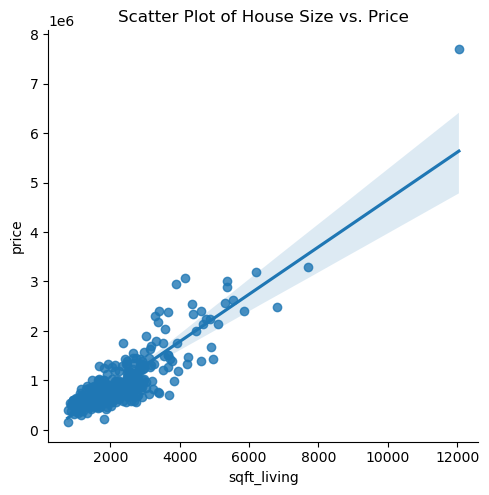

In [95]:
sns.lmplot(x='sqft_living', y='price', data=dff)
plt.title('Scatter Plot of House Size vs. Price')

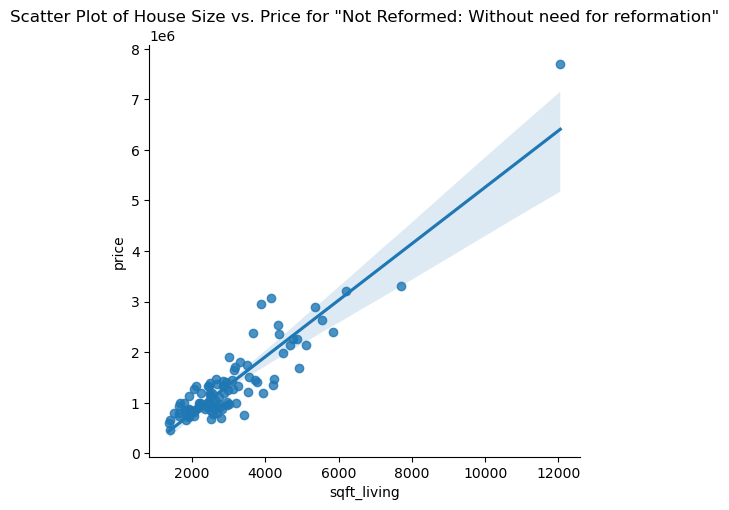

In [97]:
# Filtered the Scatter
dff_filtered = dff[dff['hist_houses_offers'] == 'Not Reformed: Without need for reformation']

# Graph
sns.lmplot(x='sqft_living', y='price', data=dff_filtered)
plt.title('Scatter Plot of House Size vs. Price for "Not Reformed: Without need for reformation"')
plt.show()

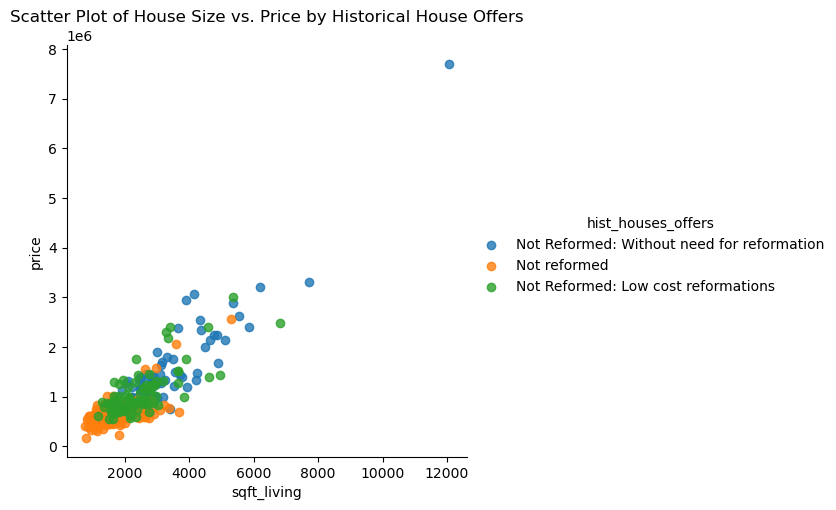

In [98]:
# Criar o gráfico de dispersão com lmplot usando 'hue' para categorizar por 'hist_houses_offers'
sns.lmplot(x='sqft_living', y='price', data=dff, hue='hist_houses_offers', fit_reg=False)
plt.title('Scatter Plot of House Size vs. Price by Historical House Offers')
plt.show()

In [102]:
# Exporting the file
dff.to_csv('dff.csv', sep=';')

In [5]:
#Importing the same
dff2 = pd.read_csv('dff.csv', delimiter=';')

In [6]:
conditions2 = dff2['hist_houses_offers'].isin(['Not Reformed: Without need for reformation', 'Not Reformed: Low cost reformations'])
df_oh = dff2[conditions2]

In [7]:
df_oh.count()

Unnamed: 0               190
id                       190
bedrooms                 190
bathrooms                190
sqft_living              190
sqft_lot                 190
floors                   190
waterfront               171
view                     189
condition                190
grade                    190
sqft_above               190
sqft_basement            183
yr_built                 190
yr_renovated              30
zipcode                  190
lat                      190
long                     190
sqft_living15            190
sqft_lot15               190
date                     190
price                    190
house_id                 190
id.1                     190
hist_houses              190
years_of_renovation      190
years_of_renovationv2     30
hist_houses_offers       190
neighborhood             190
dtype: int64

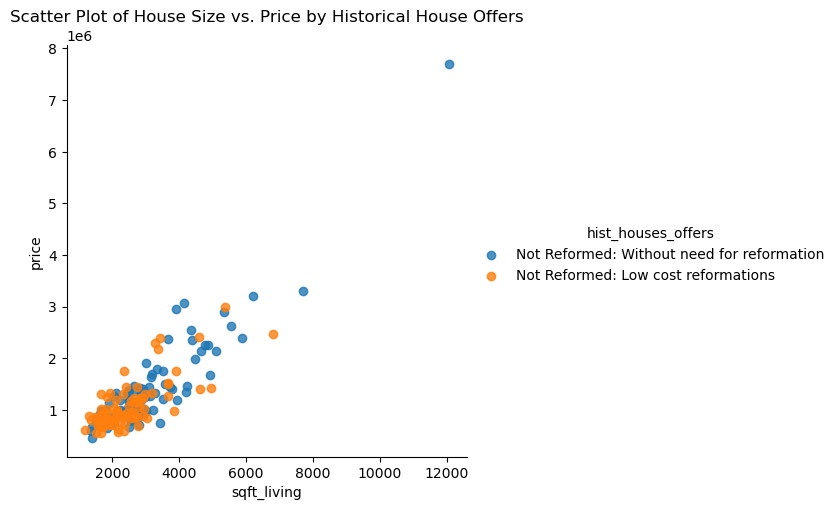

In [8]:
# Criar o gráfico de dispersão com lmplot usando 'hue' para categorizar por 'hist_houses_offers'
sns.lmplot(x='sqft_living', y='price', data=df_oh, hue='hist_houses_offers', fit_reg=False)
plt.title('Scatter Plot of House Size vs. Price by Historical House Offers')
plt.show()

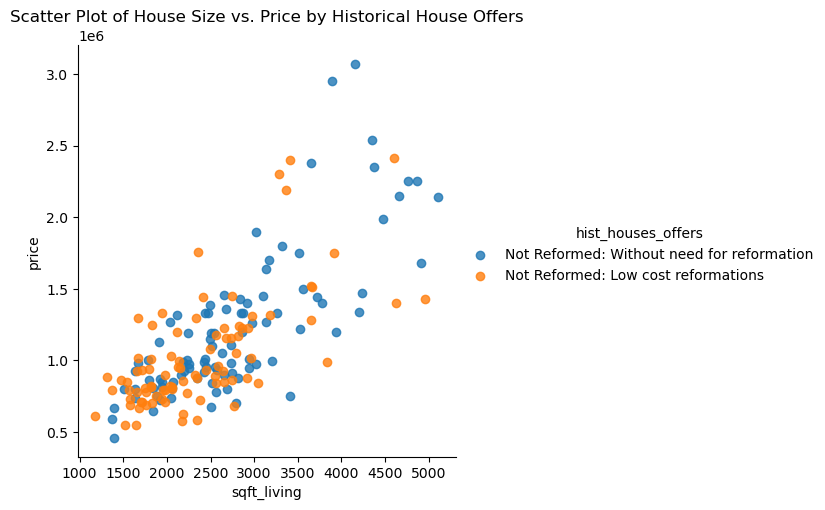

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Limits based on mean and std
limite_inferior = df_oh['sqft_living'].mean() - 2 * df_oh['sqft_living'].std()
limite_superior = df_oh['sqft_living'].mean() + 2 * df_oh['sqft_living'].std()

# Filtring the data to include the ones in theses limits
df_filtered = df_oh[(df_oh['sqft_living'] >= limite_inferior) & (df_oh['sqft_living'] <= limite_superior)]

# Graph
sns.lmplot(x='sqft_living', y='price', data=df_filtered, hue='hist_houses_offers', fit_reg=False)
plt.title('Scatter Plot of House Size vs. Price by Historical House Offers')
plt.show()

In [13]:
df_filtered['sqft_living'].mean()

2582.9175824175823

In [14]:
df_filtered['price'].mean()

1130625.6648351648

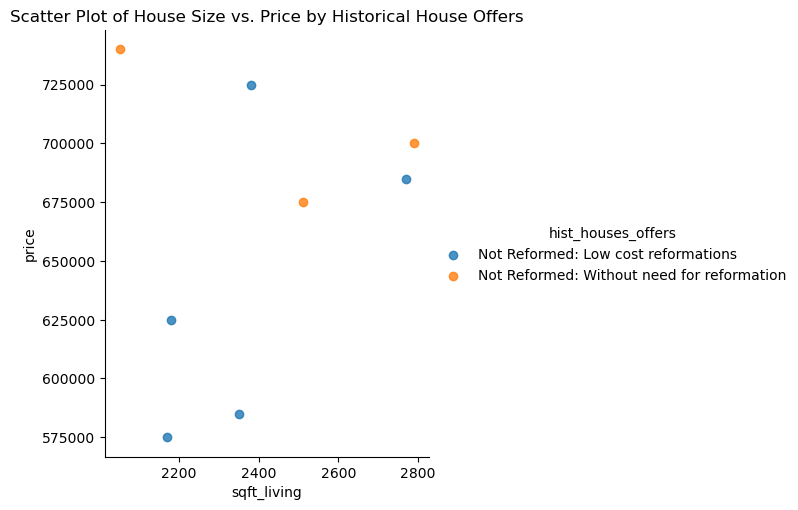

In [19]:

# Filtring the data to include the ones in theses limits
df_filteredv2 = df_oh[(df_oh['sqft_living'] >= 2000) & (df_oh['sqft_living'] <= 3000) & (df_oh['price'] <= 750000)]

# Graph
sns.lmplot(x='sqft_living', y='price', data=df_filteredv2, hue='hist_houses_offers', fit_reg=False)
plt.title('Scatter Plot of House Size vs. Price by Historical House Offers')
plt.show()

In [23]:
df_filteredv2.head()

,Unnamed: 0,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_lot15,date,price,house_id,id.1,hist_houses,years_of_renovation,years_of_renovationv2,hist_houses_offers,neighborhood
80,4768,1890000225,6.000,1.750,2380.000,4080.000,2.000,NaN,0.000,3,...,4080.000,2014-06-20,725000.000,1890000225,17372,1,9999.000,NaN,Not Reformed: Low cost reformations,Seattle
90,5017,1959700550,4.000,2.000,2050.000,4400.000,1.500,0.000,0.000,4,...,5500.000,2014-09-05,740000.000,1959700550,328,1,9999.000,NaN,Not Reformed: Without need for reformation,Seattle
180,10665,3880900245,6.000,3.000,2790.000,4550.000,2.500,NaN,0.000,4,...,4550.000,2015-02-02,700000.000,3880900245,3520,1,9999.000,NaN,Not Reformed: Without need for reformation,Seattle
188,11778,4206901155,3.000,2.000,2168.000,4000.000,1.500,0.000,0.000,3,...,4000.000,2014-09-24,575000.000,4206901155,5910,1,9999.000,NaN,Not Reformed: Low cost reformations,Seattle
238,13571,5605000595,6.000,2.250,2770.000,5854.000,1.500,0.000,0.000,3,...,5450.000,2014-12-09,685000.000,5605000595,6857,1,9999.000,NaN,Not Reformed: Low cost reformations,Seattle


In [24]:
df_best_hauses = df_filteredv2.copy()

In [25]:
df_best_hauses.head()

,Unnamed: 0,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_lot15,date,price,house_id,id.1,hist_houses,years_of_renovation,years_of_renovationv2,hist_houses_offers,neighborhood
80,4768,1890000225,6.000,1.750,2380.000,4080.000,2.000,NaN,0.000,3,...,4080.000,2014-06-20,725000.000,1890000225,17372,1,9999.000,NaN,Not Reformed: Low cost reformations,Seattle
90,5017,1959700550,4.000,2.000,2050.000,4400.000,1.500,0.000,0.000,4,...,5500.000,2014-09-05,740000.000,1959700550,328,1,9999.000,NaN,Not Reformed: Without need for reformation,Seattle
180,10665,3880900245,6.000,3.000,2790.000,4550.000,2.500,NaN,0.000,4,...,4550.000,2015-02-02,700000.000,3880900245,3520,1,9999.000,NaN,Not Reformed: Without need for reformation,Seattle
188,11778,4206901155,3.000,2.000,2168.000,4000.000,1.500,0.000,0.000,3,...,4000.000,2014-09-24,575000.000,4206901155,5910,1,9999.000,NaN,Not Reformed: Low cost reformations,Seattle
238,13571,5605000595,6.000,2.250,2770.000,5854.000,1.500,0.000,0.000,3,...,5450.000,2014-12-09,685000.000,5605000595,6857,1,9999.000,NaN,Not Reformed: Low cost reformations,Seattle


In [26]:
import folium

# Create a map centered around King County
m = folium.Map(location=[47.6062, -122.3321], zoom_start=10)

# Define marker colors for each category
category_colors = {
    'Not Reformed: Without need for reformation': 'green',
    'Not Reformed: Low cost reformations': 'red'
}

# Create a legend with the categories
legend_html = """
<div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; background-color: white;
     padding: 10px; border: 2px solid grey; border-radius: 5px;">
     <p><b>Legend</b></p>
     <p><i class="fa fa-map-marker fa-2x" style="color: green;"></i> Not Reformed: Without need for reformation</p>
     <p><i class="fa fa-map-marker fa-2x" style="color: red;"></i> Not Reformed: Low cost reformations</p>
</div>
"""

# Add the legend HTML to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Set the map title
title_html = """
<div style="position: fixed; top: 10px; left: 50px; z-index: 1000; background-color: white;
     padding: 10px; border: 2px solid grey; border-radius: 5px;">
     <h3>Best historical houses for sellers (and buyers) in King County</h3>
</div>
"""

# Add the title HTML to the map
m.get_root().html.add_child(folium.Element(title_html))

# Iterate through the DataFrame and add markers for each house
for index, row in df_best_hauses.iterrows():
    category = row['hist_houses_offers']
    if category in category_colors:
        color = category_colors[category]
    else:
        color = 'gray'  # Default color for unknown categories
    
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"House ID: {row['id']}<br>Price: ${row['price']:.2f}<br>House Grading: {row['grade']}",
        icon=folium.Icon(color=color)
    ).add_to(m)

# Display the map/ save it as HTML.
m.save('king_county_best_hist_houses_map_legend.html')

In [27]:
# Exporting the file
df_best_hauses.to_csv('df_best_hauses.csv', sep=';')

In [29]:
df_best_hauses['sqft_living'].mean()

2399.75

In [30]:
df_best_hauses['price'].mean()

663750.0

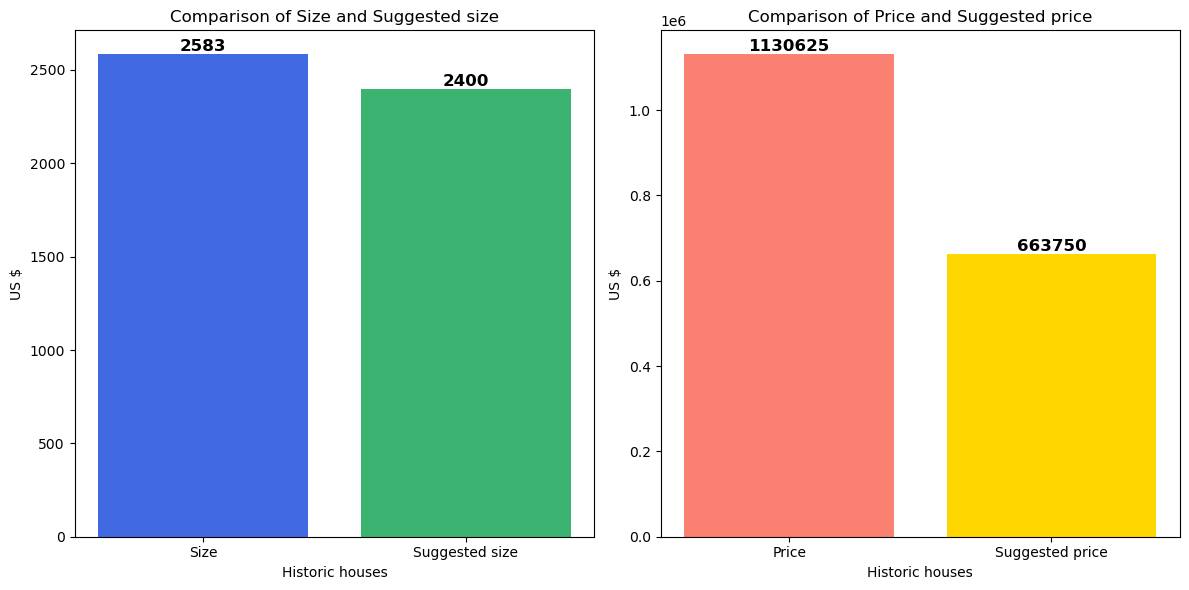

In [40]:
import matplotlib.pyplot as plt

# Dados
categories1 = ['Size', 'Suggested size']
values1 = [2583, 2400]

categories2 = ['Price', 'Suggested price']
values2 = [1130625, 663750]

# Cores para as barras
colors1 = ['royalblue', 'mediumseagreen']
colors2 = ['salmon', 'gold']

# Criação do primeiro gráfico de barras (Size e Suggested price)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(categories1, values1, color=colors1)
plt.xlabel('Historic houses')
plt.ylabel('US $')
plt.title('Comparison of Size and Suggested size')
for i, v in enumerate(values1):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Criação do segundo gráfico de barras (Price e Suggested price)
plt.subplot(1, 2, 2)
plt.bar(categories2, values2, color=colors2)
plt.xlabel('Historic houses')
plt.ylabel('US $')
plt.title('Comparison of Price and Suggested price')
for i, v in enumerate(values2):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Ajusta o espaçamento entre os gráficos
plt.tight_layout()

# Exibe os gráficos
plt.show()